## 9. Segmentation of an Image

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

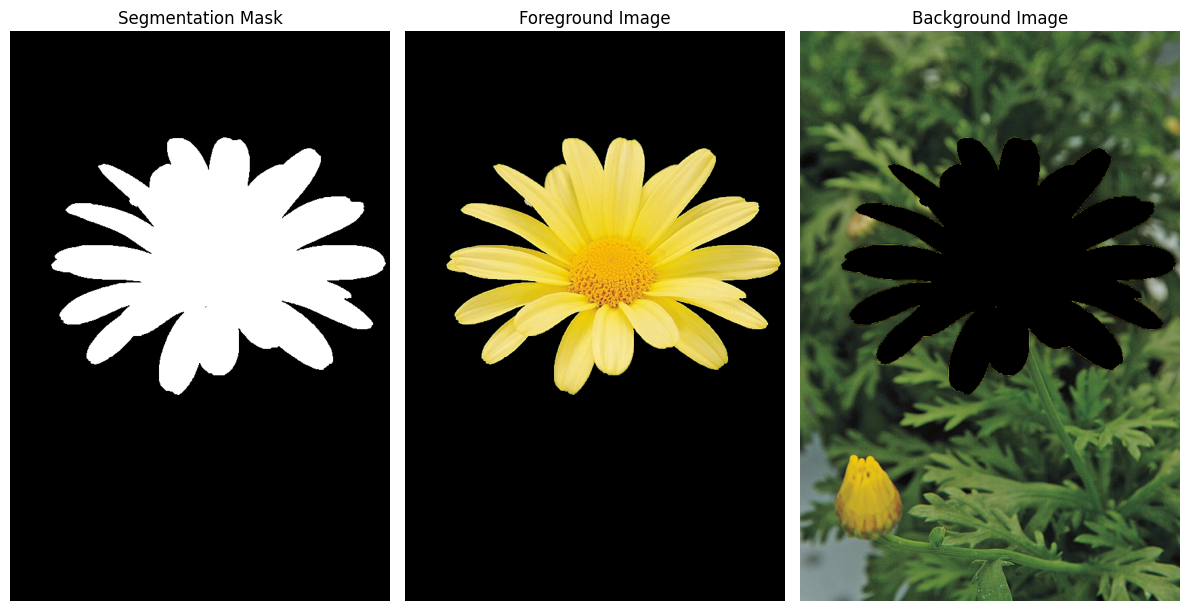

In [25]:
# Import images
daisy = cv.imread('a1images/daisy.jpg')
assert daisy is not None

# Create a mask and foreground, background models to initialize GrabCut algorithm
mask = np.zeros(daisy.shape[:2],np.uint8)
 
background_model = np.zeros((1,65),np.float64)
foreground_model = np.zeros((1,65),np.float64)

rect = (50,100,550,490) # Define rectangles around the foreground
cv.grabCut(daisy,mask,rect,background_model,foreground_model,5,cv.GC_INIT_WITH_RECT)# Apply Grabcut algorithm

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')# Modify the mask

# Extract the foreground by multiplying the mask with the image
foreground_img = daisy * mask2[:, :, np.newaxis]

# Extract the background by subtracting the foreground from the original image
background_img = cv.subtract(daisy, foreground_img)                         
   
# Show the results
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(mask2, cmap='gray')
axs[0].set_title('Segmentation Mask')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Image')
axs[1].axis('off')

axs[2].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
axs[2].set_title('Background Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

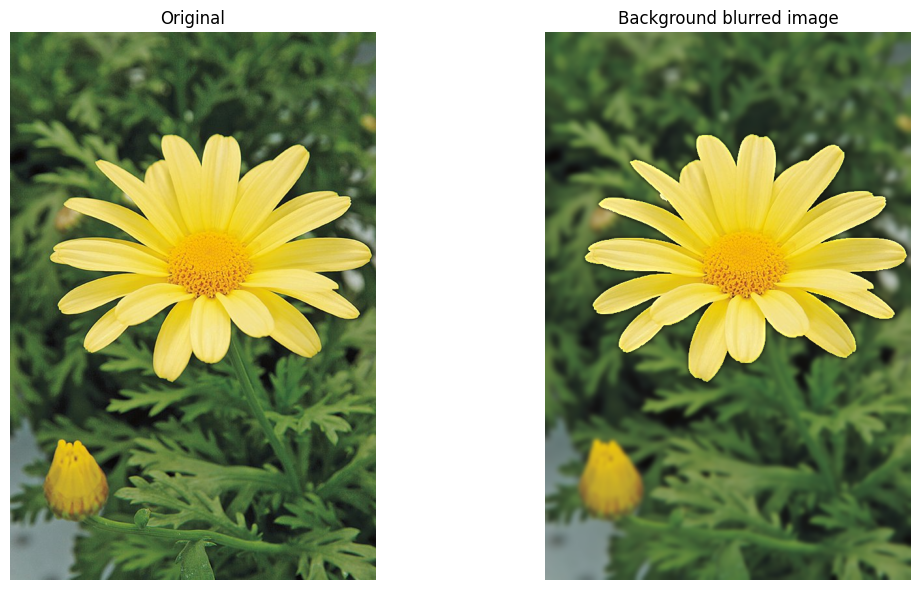

In [26]:
# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background_img, (25, 25), 3)

# Join image
blurred = cv.add(foreground_img, blurred_background)

# Show the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
axs[1].set_title('Background blurred image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Approach

The image was segmented using grabCut to separate the flower (foreground) from the background. The background region was then blurred with a Gaussian filter to create a depth-of-field effect while keeping the foreground sharp. The original and enhanced images were displayed side by side for comparison.

# Interpretation

Blurring the background improved subject emphasis but caused darkening near the flower’s edges. This occurred because background pixels close to the foreground were blended with zero-valued pixels during blurring, producing darker transition zones.